In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
from data_cleaning import full_clean
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
from visualizations import (visualization_one,
                            visualization_two,
                            visualization_three,
                            visualization_four)
from hypothesis_tests import (create_sample_dists, 
                              hypothesis_test_one, 
                              hypothesis_test_two, 
                              hypothesis_test_three, 
                              hypothesis_test_four)
warnings.filterwarnings('ignore')

In [4]:
def cohen_d(group1, group2):
    """Compute Cohen's d."""

    diff = abs(group1.mean() - group2.mean())

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)

    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)

    return d

In [5]:
LA = 'Los Angeles Lakers'
BUCKS = 'Milwaukee Bucks'
GS = 'Golden State Warriors'

In [6]:
alpha = 0.05

In [7]:
clean_data = full_clean()

In [8]:
hypothesis_test_one(alpha, clean_data)

Based on the p value of 2.751510742392795e-30 and our aplha of 0.05 we reject  the null hypothesis.
 Due to these results, we  can state that there is a difference between total points scored at home vs away.
with an effect size, cohen's d, of 0.2097173738008245 and power of 0.1256975745624566.


'Reject'

In [6]:
alpha = .05
effect_size = .8
power = .8

sample_size = TTestIndPower().solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
# Necessary sample size
sample_size

25.52457250047935

# Hypothesis Testing

### 1) Home vs Away for all teams 2015-2018

In [49]:
hypothesis_test_one(alpha, clean_data)

Ttest_indResult(statistic=11.467956098677144, pvalue=2.751510742392795e-30)
Based on the p value of 2.751510742392795e-30 and our aplha of 0.05 we reject  the null hypothesis.
 Due to these results, we  can state that there is a difference between total points scored at home vs away.
with an effect size, cohen's d, of 0.2097173738008245 and power of 0.1256975745624566.


'Reject'

In [17]:
team_wins = clean_data.loc[clean_data.game_season > 2008, ['game_date', 'team_full_name', 
                                                        'is_home', 'home_won', 'game_home_team_score', 
                                                        'game_visitor_team_score', 'home_spread', 'away_spread']]
team_wins = team_wins.drop_duplicates()
home_teams = team_wins.loc[(team_wins.is_home == 1)]
away_teams = team_wins.loc[(team_wins.is_home == 0)]

In [164]:
htest_dfs = create_sample_dists(home_teams.game_home_team_score, away_teams.game_visitor_team_score)

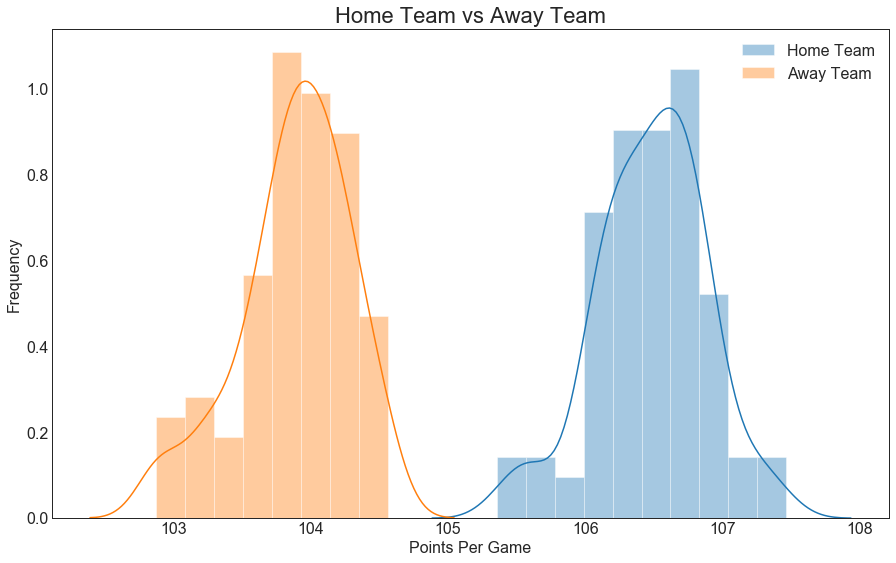

In [170]:
fig = visualization_one(htest_dfs, 'hypo1')

#### Home team advantage, but effect is small ~.2

### 2) Bucks top team of 2018.  Home vs. Away point spread.

In [54]:
hypothesis_test_two(alpha, clean_data)

Based on the p value of 1.518282388704779e-09 and our aplha of 0.05 we reject  the null hypothesis.
 Due to these results, we  can state that there is a difference between the spread of the Bucks when they play at home vs away.
with an effect size, cohen's d, of 0.4853413409453076 and power of 0.45572133196008263.


'Reject'

In [187]:
bucks = clean_data.loc[clean_data.team_full_name == BUCKS, 
                       ['game_date', 'team_full_name', 
                        'is_home', 'home_won', 'game_home_team_score', 
                        'game_visitor_team_score', 'home_spread', 'away_spread', 'game_season']
                      ].drop_duplicates()
bucks_home_spread = bucks.loc[bucks.is_home == 1, ['is_home', 'home_spread']]
bucks_away_spread = bucks.loc[bucks.is_home == 0, ['is_home', 'away_spread']]

#### Bucks spread home vs away.

In [188]:
comparison_groups = create_sample_dists(bucks_home_spread.home_spread, 
                                        bucks_away_spread.away_spread, 
                                        size = 50)

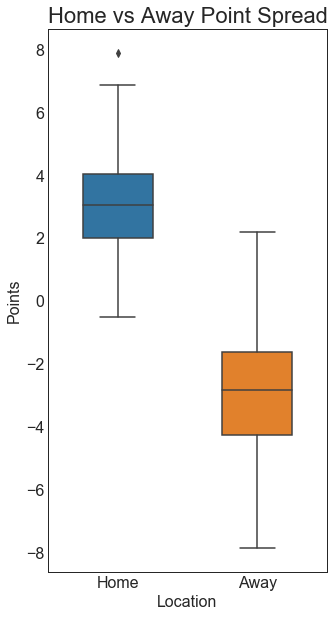

In [189]:
visualization_two(comparison_groups, 'hypo2')

### 3) Bucks 2017 vs 2018 Points scored.

In [155]:
hypothesis_test_three(alpha, clean_data)

Based on the p value of 7.304729000383075e-09 and our aplha of 0.05 we reject  the null hypothesis.
 Due to these results, we  can state that there is a difference between Gianni's total points scored when he plays at home vs away.
with an effect size, cohen's d, of 0.9719966608139783 and power of 0.9592044985890156.


'Reject'

In [190]:
bucks_2017 = bucks.loc[bucks.game_season == 2017]
bucks_2018 = bucks.loc[bucks.game_season == 2018]

bucks_2017_final = pd.concat([bucks_2017.loc[(bucks_2017.is_home == 1), 'game_home_team_score'], \
           bucks_2017.loc[(bucks_2017.is_home == 0), 'game_visitor_team_score']])

bucks_2018_final = pd.concat([bucks_2018.loc[(bucks_2018.is_home == 1), 'game_home_team_score'], \
           bucks_2018.loc[(bucks_2018.is_home == 0), 'game_visitor_team_score']])

In [191]:
comparison_groups = create_sample_dists(bucks_2017_final,
                                        bucks_2018_final)

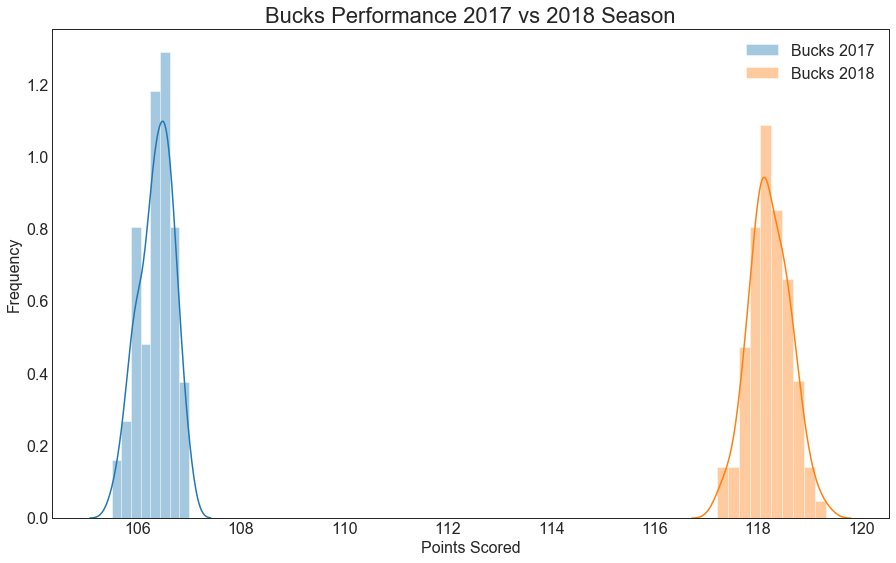

In [193]:
fig = visualization_three(comparison_groups, 'hypo3')

### 4) Giannis Home vs Away points

In [151]:
giannis = clean_data.loc[(clean_data.player_first_name == 'Giannis') & (clean_data.player_last_name == 'Antetokounmpo')
                        & clean_data.game_season.isin([2017, 2018])]
giannis = giannis.reset_index()
giannis_home = giannis.loc[giannis.is_home == 1, ['pts']]
giannis_away = giannis.loc[giannis.is_home == 0, ['pts']]

In [152]:
hypothesis_test_four(alpha, clean_data)

Based on the p value of 0.5386689857180165 and our aplha of 0.05 we fail to reject  the null hypothesis.
 Due to these results, we  cannot state that there is a difference between Gianni's total points scored when he plays at home vs away.
.


'Fail to reject'

In [194]:
htest_dfs = create_sample_dists(giannis_home.pts, giannis_away.pts)

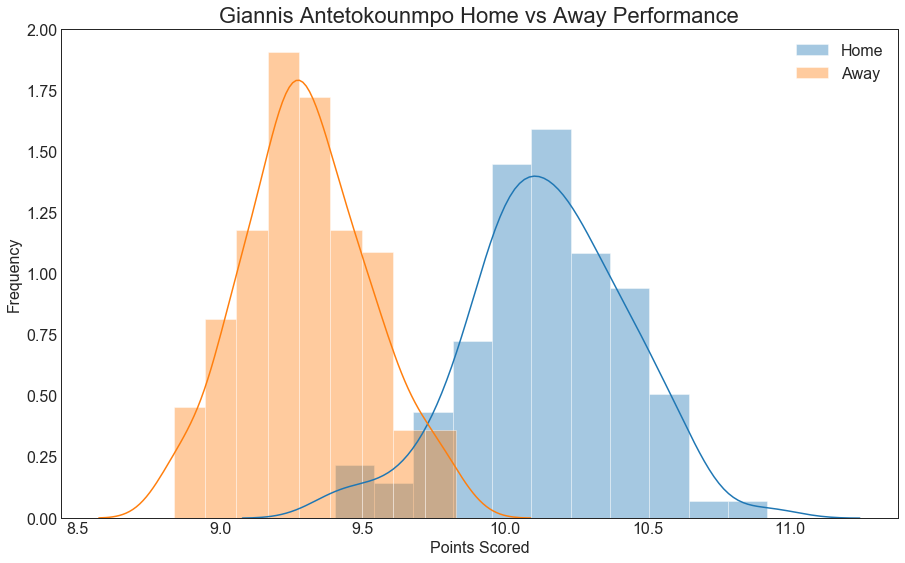

In [196]:
fig = visualization_four(htest_dfs, 'hypo4')

In [ ]:
# Calc T Manual check
home_mean = home_teams.game_home_team_score.mean()
home_std = home_teams.game_home_team_score.std()
home_len = home_teams.game_home_team_score.shape[0]
away_mean = away_teams.game_visitor_team_score.mean()
away_std = away_teams.game_visitor_team_score.std()
away_len = away_teams.game_visitor_team_score.shape[0]
t = (home_mean - away_mean) / np.sqrt((home_std**2/ home_len) + (away_std**2/ away_len))
t